# Notebook to go from WebPlotDigitizer to a .las file


[WebPlotDigitizer](https://apps.automeris.io/wpd/).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio

from scipy import interpolate
from datetime import datetime

In [2]:
df = pd.read_csv('WebPlot_GR.csv')
df.head(3)

,GR,DEPTH
0,66.928233,9630.561113
1,65.189664,9631.175114
2,63.488337,9631.342734


In [3]:
depth_max = np.max(df.DEPTH)
depth_min = np.min(df.DEPTH)

In [6]:
# Might have to do some napkin math to figure out what kind of spacing you want
bottom_bigger = round(depth_max, 1)
top_smaller = round(depth_min, 1)

# Making the depth ranges to the .1 Ft
Depth_array = np.linspace(top_smaller, bottom_bigger, (round(bottom_bigger-top_smaller,1)*10)+1, endpoint=True)

/anaconda3/envs/wells/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


In [5]:
f = interpolate.interp1d(df.DEPTH.values, df.GR.values)
x = Depth_array

new_phi = f(x)
phi_2 = np.around(new_phi, decimals=4) # rounded it a bit

In [72]:
d = {'DEPTH': x, 'GR': phi_2}
df_new = pd.DataFrame(data=d) # just making a new data frame

## Visual comparison of both datasets

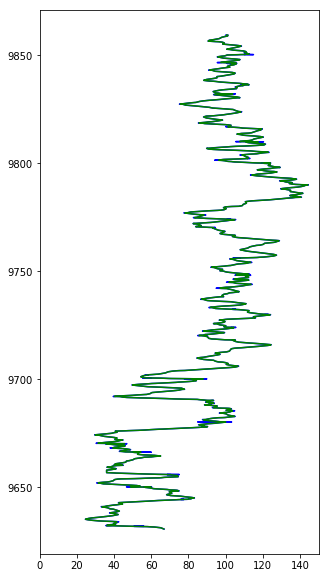

In [7]:
plt.figure(figsize=(5,10))
plt.plot(df.GR.values, df.DEPTH.values, color='b') # old values
plt.xlim([0, 150])
plt.plot(phi_2, x, color='g') # new values


In [69]:
# lets make this .las file
las = lasio.LASFile()
las.well.DATE = str(datetime.today()) #
las.well.API = '867-5309'
las.well.STAT = 'Utaharado'
las.well.WELL = '#1 Wild CatZ'
las.well.CNTY = 'USA'
las.well.COMP = 'Digitized by Thomas Martin, Colorado School of Mines'
las.well.FLD = 'Big Sur'
las.well.UWI = '123454321'
las.well.LOC = 'Planet Earth'

las.set_data_from_df(df_new.set_index("DEPTH")) #have to set what the index will be

las.curves.GR.unit = 'API'
las.curves.DEPTH.unit = 'Feet'

las.write('swung_discovery111.las', version=2) # Specifing version 2 las

All done! Double check the .las file